# ENVIRONMENT : yolo_tf


In [3]:


with open('main.py', 'w') as file_main:
    with open('master.py', 'r') as file_master:
        for line in file_master:
            if line.strip().startswith('#'):
                pass
            else:
                file_main.write(line)
                



In [6]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path='movenet_t.tflite')
interpreter.allocate_tensors()
input_details, output_details = interpreter.get_input_details(), interpreter.get_output_details()

input_details[0]['shape'][1]


256

In [9]:
import json

# 寫入 JSON 檔案
data = {
    'focusOn' : [0, 7 , 9, 11],
}

with open('data.json', 'w') as f:
    json.dump(data, f)

# 讀取 JSON 檔案以確認寫入成功
with open('data.json', 'r') as f:
    read_data = json.load(f)
    print(read_data['focusOn'])




[0, 7, 9, 11]


# Model Inference


In [3]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

def inferences(imp):
    interpreter = tf.lite.Interpreter(model_path='utils/models/movenet_t.tflite')
    interpreter.allocate_tensors()

    input_details  = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    image = cv2.resize(imp, (input_details[0]['shape'][1], input_details[0]['shape'][1]), interpolation=cv2.INTER_AREA)
    image = tf.expand_dims(image, axis=0)
    # image = tf.expand_dims(tf.compat.v1.image.decode_jpeg(tf.io.read_file(imp)), axis=0)
    
    interpreter.set_tensor(input_details[0]['index'], tf.cast(image, dtype=tf.uint8).numpy())
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])

    image_bgr = imp
    high, width, _ = image_bgr.shape

    for keypoint in keypoints_with_scores[0][0]:
        cv2.circle( image_bgr, ( int(width*keypoint[1]), int(high*keypoint[0]) ), 3, (0, 0, 255), 3 )

    return image_bgr




In [ ]:
import cv2

video_path = "labels/Allen-Strtength-Square.mp4"
cap = cv2.VideoCapture( video_path )


count = 0
while cap.isOpened():
    ret, frame = cap.read()
    
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    count += 1
    
    
cap.release()




In [21]:
int(191/4), int(2*191/4), int(3*191/4) 

(47, 95, 143)

# square video inferenc 

fps :  60.0
(930, 930, 3)


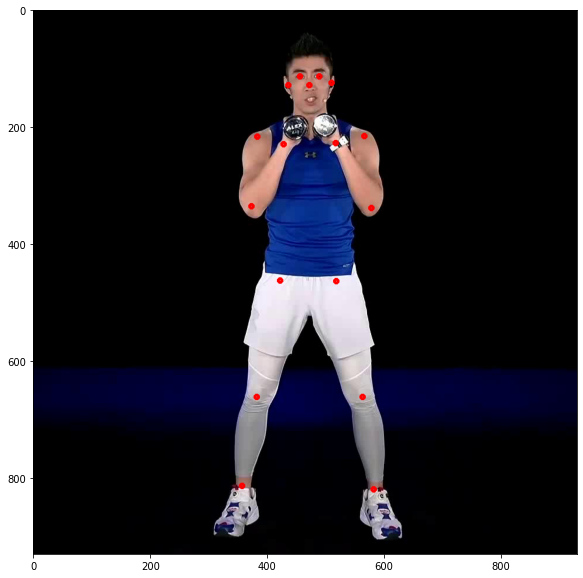

In [9]:
import cv2
import matplotlib.pyplot as plt

# 1 ~ 192
video_path = "labels/Allen-Strtength-Square.mp4"
cap = cv2.VideoCapture( video_path )

fps = cap.get(cv2.CAP_PROP_FPS)
print('fps : ', fps)

count = 0
while cap.isOpened():
    ret, frame = cap.read()
    
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    count += 1
    if count == 1:
        print(frame.shape)
        break
    

cap.release()

image_bgr = inferences(frame)



plt.figure(figsize=(10,10))
plt.imshow(image_bgr[:,:,::-1])
plt.show()




In [13]:
pwd

'/Users/owenchen/Documents/codes/dummy_action'

# load pickle file

write data to json file


In [29]:
import numpy as np
import pickle
import json

pickle_coach_path = 'labels/Allen-Strtength-Square.pickle'
json_path = 'utils/datas/label.json'

# 讀取 JSON 檔案以確認寫入成功
with open(json_path, 'r') as f:
    read_data = json.load(f)
    print(read_data)


# Load
with open(pickle_coach_path, 'rb') as f:
    coach_keypoint_list = pickle.load(f)


coach_keypoint_sequence = []
template = [{
        "pointIndex"  : read_data['pointIndexList'][0], 
        "threshold"   : read_data['thresholds'],
        "checkPoints" : []
    },
    {
        "pointIndex"  : read_data['pointIndexList'][1], 
        "threshold"   : read_data['thresholds'],
        "checkPoints" : []
    },
    {
        "pointIndex"  : read_data['pointIndexList'][2], 
        "threshold"   : read_data['thresholds'],
        "checkPoints" : []
    },
    {
        "pointIndex"  : read_data['pointIndexList'][3], 
        "threshold"   : read_data['thresholds'],
        "checkPoints" : []
    },
]

for i in read_data['frameIndexList']:
    for j, index in enumerate(read_data['pointIndexList']):
        template[j]["checkPoints"].append(
            {
                "x" : int(read_data['starPoint']['x'] + coach_keypoint_list[i][index][1] * read_data['scale']),
                "y" : int(read_data['starPoint']['y'] + coach_keypoint_list[i][index][0] * read_data['scale']),
                "d" : read_data['distances']
            }
        )

    
data = {
    "focusOnHumanKeypoint" : template,
}

with open('data.json', 'w') as f:
    json.dump(data, f)        
    




{'pointIndexList': [9, 10, 11, 12], 'frameIndexList': [1, 47, 95, 143, 191], 'thresholds': 0.5, 'scale': 720, 'distances': 10, 'starPoint': {'x': 0, 'y': 0}}


In [24]:
coach_keypoint_list[170][10]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.2291413 , 0.48682535, 0.80812556], dtype=float32)>

In [53]:
import cv2

video_path = "labels/Allen-Strtength-Cut.mp4"
cap = cv2.VideoCapture( video_path )

fps = cap.get(cv2.CAP_PROP_FPS)
print('fps : ', fps)

frame_size = (930, 930)
fourcc     = cv2.VideoWriter_fourcc(*'mp4v')
out        = cv2.VideoWriter('labels/Allen-Strtength-Square.mp4', fourcc, 60, frame_size)


def cut_show(image_bgr):
    # 裁切區域的 x 與 y 座標（左上角）
    x = 480
    y = 150

    # 裁切區域的長度與寬度
    w = 930
    h = 930
    
    # 裁切圖片
    crop_image_bgr = image_bgr[y:y+h, x:x+w]
    return crop_image_bgr


while cap.isOpened():
    ret, frame = cap.read()
    
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    frame_cut = cut_show(frame)
    out.write(frame_cut)
    
    
cap.release()
out.release()




fps :  59.94005994005994
Can't receive frame (stream end?). Exiting ...


In [ ]:
import cv2

video_path = "labels/Allen-Strtength.mp4"
cap = cv2.VideoCapture( video_path )
count = 0

cut_index = [526, 585, 624]

while cap.isOpened():
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    
    count += 1
    # cv2.imshow('frame', frame)

    #if count == cut_index[0] or count == cut_index[1] or count == cut_index[2]:
    #    cut_show(frame)
    if count > 625 and count < 635:
        print('count: ', count)
        cut_show(frame)

    if count == cut_index[2]:
        break

cap.release()
#cv2.destroyAllWindows()




In [32]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


image_rgb = frame[:,:,::-1]

print('shape : ', image_rgb.shape)


# plt.figure(figsize=(15,15))
# plt.imshow(image_rgb)
# plt.show()


def cut_show(image_bgr):
    # 裁切區域的 x 與 y 座標（左上角）
    x = 480
    y = 150

    # 裁切區域的長度與寬度
    w = 930
    h = 930
    # 裁切圖片
    crop_image_bgr = image_bgr[y:y+h, x:x+w]

    plt.figure(figsize=(10,10))
    plt.imshow(crop_image_bgr[:,:,::-1])
    plt.show()






shape :  (1080, 1920, 3)


In [42]:
from queue import Queue
import numpy as np




q = Queue()

print(q.qsize())
q.put(0.234)
print(q.qsize())
q.put(1.234)
print(q.qsize())
q.put(2.234)
print(q.qsize())
q.put(3.567)
if q.qsize() > 3:
    q.get()
print(q.qsize())


time_array = np.array(list(q.queue))

print(time_array)

np.mean(time_array)



0
1
2
3
3
[1.234 2.234 3.567]


2.345

# 讀 pickle


keys :  dict_keys(['left_arm', 'right_arm', 'left_leg', 'right_leg', 'all'])


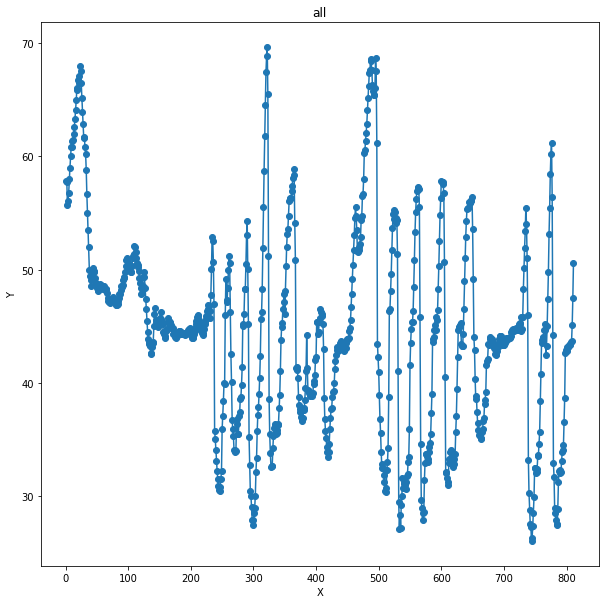

In [21]:
import pickle
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))


# toolNew 手 20 (25)  腳 45 - 55
# toolOld 手 20 (25)  腳 45 - 55
pickle_path = 'pickles/5-23_Carlin/tmp_toolNew.pickle'



with open(pickle_path, 'rb') as f:
    tmp = pickle.load(f)

print('keys : ', tmp.keys())

key_name = list(tmp.keys())[-1]

# 假設有一個浮點數列表
data = tmp[key_name]
# 建立 x 軸的數值
x = range(1, len(data) + 1)

# 繪製折線圖
plt.plot(x, data, marker='o')

# 設定圖表標題和軸標籤
plt.title(key_name)
plt.xlabel('X')
plt.ylabel('Y')

# 顯示圖表
plt.show()





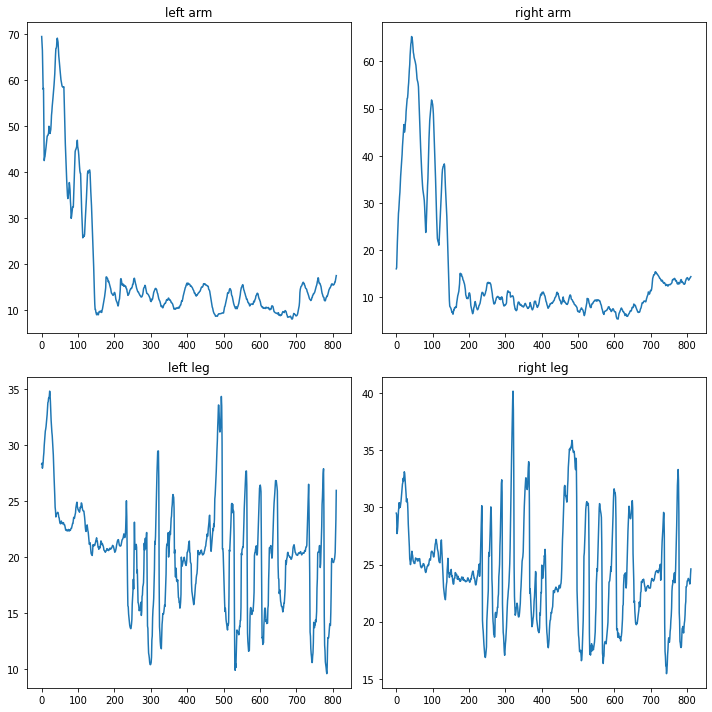

In [22]:
import matplotlib.pyplot as plt
import numpy as np


# 創建子圖
fig, axes = plt.subplots(2, 2, figsize=(10, 10))


# 資料
data1 = tmp[list(tmp.keys())[0]]
data2 = tmp[list(tmp.keys())[1]]
data3 = tmp[list(tmp.keys())[2]]
data4 = tmp[list(tmp.keys())[3]]

# 第一張圖
axes[0, 0].plot(data1)
axes[0, 0].set_title('left arm')

# 第二張圖
axes[0, 1].plot(data2)
axes[0, 1].set_title('right arm')

# 第三張圖
axes[1, 0].plot(data3)
axes[1, 0].set_title('left leg')

# 第四張圖
axes[1, 1].plot(data4)
axes[1, 1].set_title('right leg')

# 調整子圖間的間距
plt.tight_layout()

# 顯示圖表
plt.show()



# Matplotlib 中預定義的一些顏色名稱

* 'b' 或 'blue'：藍色
* 'g' 或 'green'：綠色
* 'r' 或 'red'：紅色
* 'c' 或 'cyan'：青色
* 'm' 或 'magenta'：洋紅色
* 'y' 或 'yellow'：黃色
* 'k' 或 'black'：黑色
* 'w' 或 'white'：白色

* 'navy'：海軍藍
* 'teal'：藍綠色
* 'maroon'：褐紅色
* 'purple'：紫色
* 'olive'：橄欖色
* 'silver'：銀色
* 'gray'：灰色





In [ ]:
import matplotlib.pyplot as plt
import numpy as np



_length = len(tmp[list(tmp.keys())[0]])
# 生成資料
x = range(0, _length, 1)

y0 = tmp[list(tmp.keys())[0]]
y1 = tmp[list(tmp.keys())[1]]
y2 = tmp[list(tmp.keys())[2]]
y3 = tmp[list(tmp.keys())[3]]
y4 = tmp[list(tmp.keys())[4]]


plt.figure(figsize=(10, 10))

# 繪製圖形
plt.plot(x, y0, color='red', label='left arm')
plt.plot(x, y1, color='magenta', label='right arm')
plt.plot(x, y2, color='blue', label='left leg')
plt.plot(x, y3, color='navy', label='right leg')
plt.plot(x, y4, color='purple', label='all')


# 設定標籤和標題
plt.xlabel('x')
plt.ylabel('y')
plt.title('Multiple Distance Sets')

# 設定圖例
plt.legend()

# 限制 x 和 y 軸的範圍
plt.xlim(0, _length)
plt.ylim(0, 100)

# 顯示圖形
plt.show()




<Figure size 720x720 with 0 Axes>

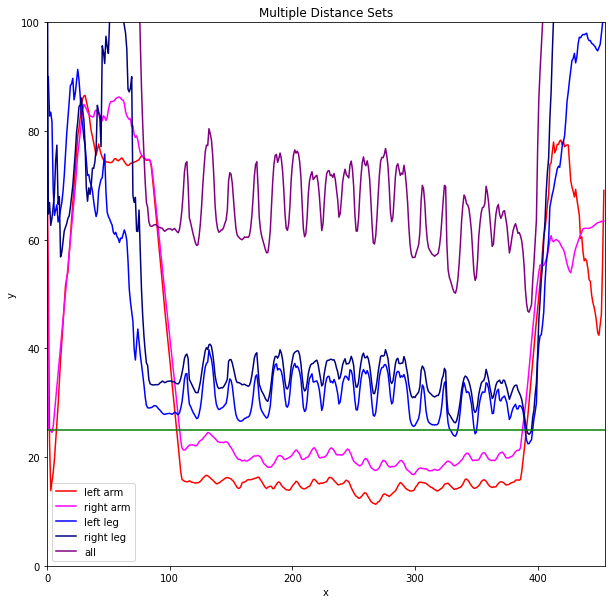

In [31]:
import pickle
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

pickle_path_index = 0

pickle_path_list = [
    'pickles/tmp_toolNew.pickle',
    'pickles/5-23_Carlin/tmp_toolNew.pickle',
    'pickles/5-23_Carlin/tmp_toolOld.pickle',
    'pickles/5-23_Carlin/tmp_toolNew_25.pickle',
    'pickles/5-23_Carlin/tmp_toolOld_25.pickle',
    'pickles/5-23_Richard/tmp_toolNew.pickle',
    'pickles/5-23_Richard/tmp_toolOld.pickle',
    'pickles/5-23_Richard/tmp_toolNew_25.pickle',
    'pickles/5-23_Richard/tmp_toolOld_25.pickle',
    'pickles/5-23_Paul/tmp_toolNew.pickle',
    'pickles/5-23_Paul/tmp_toolOld.pickle',
    'pickles/5-23_Paul/tmp_toolNew_25.pickle',
    'pickles/5-23_Paul/tmp_toolOld_25.pickle',
]

# toolNew 手 20 (25)  腳 45 - 55
# toolOld 手 20 (25)  腳 45 - 55
# toolNew_25 手 23       腳 38 - 46
pickle_path = pickle_path_list[pickle_path_index]

with open(pickle_path, 'rb') as f:
    tmp = pickle.load(f)


_length = len(tmp[list(tmp.keys())[0]])
# 生成資料
x = range(0, _length, 1)

y0 = tmp[list(tmp.keys())[0]]
y1 = tmp[list(tmp.keys())[1]]
y2 = tmp[list(tmp.keys())[2]]
y3 = tmp[list(tmp.keys())[3]]
y4 = tmp[list(tmp.keys())[4]]


plt.figure(figsize=(10, 10))

# 繪製圖形
plt.plot(x, y0, color='red', label='left arm')
plt.plot(x, y1, color='magenta', label='right arm')
plt.plot(x, y2, color='blue', label='left leg')
plt.plot(x, y3, color='navy', label='right leg')
plt.plot(x, y4, color='purple', label='all')

plt.axhline(25, color='green')

# 設定標籤和標題
plt.xlabel('x')
plt.ylabel('y')
plt.title('Multiple Distance Sets')

# 設定圖例
plt.legend()

# 限制 x 和 y 軸的範圍
plt.xlim(0, _length)
plt.ylim(0, 100)

# 顯示圖形
plt.show()




In [19]:
y4

[48.5109477583561,
 47.41678656449403,
 47.54044819556446,
 47.22607720851436,
 46.33268132286362,
 46.384934711639474,
 45.54027436010423,
 45.47178292837532,
 45.71490670100971,
 45.64894793738708,
 45.72052461892871,
 45.92869222390859,
 46.10554500512933,
 46.380556019326775,
 46.866187549551555,
 47.23269179677488,
 47.82374049987237,
 48.265423806364154,
 48.53272437023,
 48.796290072341755,
 49.20198584508863,
 49.51345466622045,
 49.159455568773076,
 49.2420155639299,
 49.45134558975499,
 49.781843657920106,
 49.31085769964737,
 48.83150333455424,
 48.56634786107115,
 48.3998747108996,
 48.09970685242215,
 48.23055538596326,
 48.52207859761905,
 48.57342040539352,
 48.75254654985447,
 48.910719258578155,
 49.025533311827814,
 49.29238328185566,
 49.116749980845356,
 48.685804507075986,
 48.35560432767744,
 47.85036465965139,
 47.4388186744968,
 47.300664331640874,
 47.11230612610592,
 47.09028457817454,
 46.874850210966684,
 47.083367730198916,
 47.123026122712616,
 47.40780863

# test pickle

* tmp_test_1
* tmp_test_2

## left_arm
* index_list = ((5,7), (7,9))

## right_arm
* index_list = ((6,8), (8,10))

## left_leg
* index_list = ((11,13), (13,15))

## right_leg
* index_list = ((12,14), (14,16))






# 測試分數算法


In [202]:
import numpy as np

index_pt = 2
index_r  = 3
d        = 2.3


check_points = [5.6, 6.3, 7.9, 3.9, 4.8, 5.9, 6.5, 0.9, 1.65, 9.8]
real_points  = [1.2, 2.3, 3.4, 4.5, 5.6, 6.7, 7.8, 8.9, 9.1, 7.9]


def changeAngleList(keypoints, k1, k2):
    _f = lambda pt1, pt2: float( np.angle( np.complex(pt2[1] - pt1[1], pt1[0] - pt2[0]) ) )
    return [_f(keypoint[k1], keypoint[k2])  for keypoint in keypoints]

def distance_map(ch_pt, r_pt):
    _diff = np.array(ch_pt) - np.array(r_pt)
    acc   = 0

    if type(_diff) is np.ndarray:
        for _ in _diff:
            acc += (_**2)
        _d = np.sqrt(acc)
        return _d, _diff

    elif type(_diff) is list:
        for _ in _diff:
            acc += (_**2)
        _d = np.sqrt(acc)
        return _d, _diff

    elif type(_diff) is tuple:
        for _ in _diff:
            acc += (_**2)
        _d = np.sqrt(acc)
        return _d, _diff

    else:
        return abs(_diff), _diff
    return abs(r_pt - ch_pt)

def transform_point(pt):
    pt_new_y = pt * 2 - 10
    pt_new_x = (pt - 3) * ( -3 ) + 10
    return (pt_new_y, pt_new_x)
    # return (pt*2-10)

def judgement(_d, real_pt, check_pts, index_begin, index_range = 2, change_map = (lambda x: x) ):
    """
    The output is an array of length 4
    0 : the first element output[0] is a flag, true or false
        true mean pass can go to other index 
        false mean not pass, we should stay here (same index)
    1 : the second element is the score in [0,1] or -1
        if the first element is true
            the second element is the score in [0,1]
        else if the first element is false
            the second element is -1
    2 : the third element is the new index
    3 : the modify array
    """
    _map = map(lambda pt: distance_map(
                                    change_map(pt), 
                                    change_map(real_pt)
                                ), 
                check_pts[index_begin:(index_begin + index_range)])
    distance_obj = np.array(list(_map), dtype=object)
    if len(distance_obj) < index_range:
        _map = map(lambda pt: distance_map(
                                    change_map(pt), 
                                    change_map(real_pt)
                                ), 
                check_pts[:(index_range - len(distance_obj))])
        more_obj = np.array(list(_map), dtype=object)
    distance_obj = np.append(distance_obj, more_obj, axis=0)

    print('dis : ', distance_obj)

    if distance_obj[0][0] < _d:
        return True, 0, (index_begin+1), distance_obj[0][1]

    print('dis ch : ', distance_obj[:,0])
    print('argmin dis ch : ', np.argmin(distance_obj[:,0]))

    index_argmin = np.argmin(distance_obj[:,0])
    if index_argmin > 0:
        return True, (_d/distance_obj[0][0]), ((index_begin+index_argmin) % len(check_pts)), distance_obj[0][1]
    else:
        return False, -1, index_begin, distance_obj[0][1]
    
    # print(type(distance_obj), len(distance_obj), index_range)
    
    



# distance_map(check_points[index_pt], real_points[index_r])

# _map = map(lambda pt: distance_map(transform_point(pt), transform_point(real_points[index_r])), check_points[1:8])

# _ = np.array(list(_map), dtype=object)
# index_min = np.argmin(np.array(_))


# index_min

c_pts = [transform_point(check_points[i]) for i in range(len(check_points))]
r_pt = transform_point(real_points[3])

# judgement(d, real_points[3], check_points, 8, 4)
judgement(d, r_pt, c_pts, 8, 4)





dis :  [[10.27582113507237 array([ 5.7 , -8.55])]
 [19.109421759959144 array([-10.6,  15.9])]
 [3.9661064030103867 array([-2.2,  3.3])]
 [6.4899922958351794 array([-3.6,  5.4])]]
dis ch :  [10.27582113507237 19.109421759959144 3.9661064030103867
 6.4899922958351794]
argmin dis ch :  2


(True, 0.22382639496807488, 0, array([ 5.7 , -8.55]))

In [204]:

r_pt


(-1.0, 5.5)

In [139]:

len(check_points)


check_points[8]*2 - 10, real_points[2]*2 - 10


(-6.7, -3.2)

In [26]:
transform_point(check_points[index_pt])

5.800000000000001

In [31]:
type([2.1, 3.5]) is list



True

In [33]:
type(np.array([2.1, 3.5])) is np.ndarray

True

In [39]:
distance_map( (1,2), (2,5) )

(3.1622776601683795, array([1, 3]))

In [169]:
import json
json_path = "utils/datas/data-emily-down-ankle-left.json"

with open(json_path, 'r') as f:
    read_data = json.load(f)

changeAngleList([read_data["label"][_]["keypoints"] for _ in range(len(read_data["label"]))], 13, 15)

# read_data["label"][0]["keypoints"]


[-1.2208764579938072,
 -1.225075705667335,
 -1.2129221030672084,
 -1.1916528731134182,
 -1.1596610722759548,
 -1.1380852295522115,
 -1.109188094088823,
 -1.059528944568977,
 -1.002350224868452,
 -0.9643049964787164,
 -0.9565900191102881,
 -0.9428462068327791,
 -0.9289553658798204,
 -0.9204026827043752,
 -0.9070546740678501,
 -0.8978642497458296,
 -0.8734984226133093,
 -0.8552063349010339,
 -0.8614948289777176,
 -0.8204916535944061,
 -0.8162269665185353,
 -0.7951006418390736,
 -0.764046662593332,
 -0.7603678248037682,
 -0.7874304406611163,
 -0.7874627053924518,
 -0.7977952181332534,
 -0.7957809767164349,
 -0.7892773189909762,
 -0.7972638751503328,
 -0.8009176188226922,
 -0.8066997749960142,
 -0.8081239107950825,
 -0.7989833918189864,
 -0.8044259244105368,
 -0.8074840263390163,
 -0.8049019476369998,
 -0.80954658554982,
 -0.8056410625146587,
 -0.8035093130428694,
 -0.8087558907250382,
 -0.7915624968204985,
 -0.7816353930748055,
 -0.7820714581893786,
 -0.8147042724006646,
 -0.7956530217441

In [164]:
[read_data["label"][_]["keypoints"] for _ in range(len(read_data["label"]))]

TypeError: unhashable type: 'list'

In [176]:
focus_on = read_data['focusOnHumanKeypoint']

for focus in focus_on:
    checkPoints_index = [focus["checkPoints"][_]["label_index"] for _ in range(len(focus["checkPoints"]))]

_tmp = changeAngleList([read_data["label"][_]["keypoints"] for _ in range(len(read_data["label"]))], 13, 15)

# [_tmp[_] for _ in checkPoints_index]
    
np.array(_tmp)[checkPoints_index]



array([-1.22087646, -0.94284621, -0.76404666, -0.79898339, -0.81470427,
       -0.96036124, -1.22626562, -1.24651542])

In [ ]:
# read_data['label']


checkPoints_index = [read_data["focusOnHumanKeypoint"][2]['checkPoints'][_]['label_index'] for _ in range(len(read_data["focusOnHumanKeypoint"][2]['checkPoints']))]

# focus['checkPoints'][toby_Flag[index_f]]

np.array(read_data['label'])[checkPoints_index]


In [213]:
str(np.round(np.array((1/3,2/3)) - np.array((3,4)),3))

'[-2.667 -3.333]'

In [227]:
_ = [[0] * 3] *3


np.mean(_[0])



0.0

In [224]:
_ = [[]]*3


# np.append(_, [1,2,3])
#_.append([1,2,3])

_[0] = [3,4]

_

[[3, 4], [], []]

In [156]:
keypoints = [[0.13220848, 0.48924538, 0.7835514 ],
            [0.11808832, 0.507338  , 0.9269673 ],
            [0.11586474, 0.47119266, 0.7952114 ],
            [0.13349646, 0.5322431 , 0.77458894],
            [0.13432735, 0.44855928, 0.90710753],
            [0.22873516, 0.58873   , 0.8840973 ],
            [0.22969893, 0.39119416, 0.9431269 ],
            [0.364413  , 0.5937075 , 0.8451284 ],
            [0.35422954, 0.37843633, 0.9374558 ],
            [0.2379654 , 0.52156335, 0.68903804],
            [0.23534794, 0.4421858 , 0.7823508 ],
            [0.4937326 , 0.5439259 , 0.7958367 ],
            [0.49153888, 0.44074002, 0.8200263 ],
            [0.7043596 , 0.5884723 , 0.858057  ],
            [0.712831  , 0.39008403, 0.8353869 ],
            [0.8764602 , 0.6147037 , 0.89300144],
            [0.88198245, 0.36701894, 0.91249615]]

keypoints = np.array(keypoints)


{ a[2] for a in keypoints }


{0.68903804,
 0.77458894,
 0.7823508,
 0.7835514,
 0.7952114,
 0.7958367,
 0.8200263,
 0.8353869,
 0.8451284,
 0.858057,
 0.8840973,
 0.89300144,
 0.90710753,
 0.91249615,
 0.9269673,
 0.9374558,
 0.9431269}

In [149]:

_ = lambda z: z

def my_test(x):
    global _
    _ = lambda z: z**2
    return _(x)



print(_(3))

print( my_test(3) )

print(_(3))



3
9
9


In [180]:
_f = lambda z: z**2

_list = [1,2,3,4,5]

list(map(_f, _list))





[1, 4, 9, 16, 25]

# Version

XX.XX.XX

main model version . modify information . little version


## 想法


video clip 生 pickle 跟 json
教練名 動作主ＩＤ 加 labels.json


教練名 動作主ＩＤ sub focus.json



整堂課



# Colab Link

https://colab.research.google.com/drive/19qj1nNhLtU3nnVNLdc-s-2d9fWss7gKo?usp=sharing










In [55]:

for i in range(2**3):
    _ = str(bin(i))[2:]
    print(_.zfill(3))

    

000
001
010
011
100
101
110
111


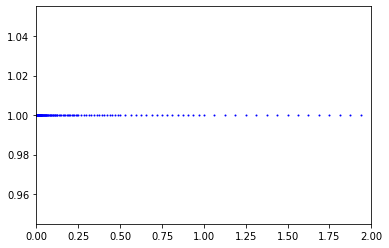

In [80]:
import numpy as np
import matplotlib.pyplot as plt


value_list = []
mantissa_number = 4
exponent_number = 6

def integer_to_binary_string(integer, number):
    return str(bin(integer))[2:].zfill(number)


for i_m in range( 2**mantissa_number ):
    for i_e in range( 2**exponent_number):
        mantissa_txt = integer_to_binary_string(i_m, mantissa_number)
        mantissa = 1.0 + (int(mantissa_txt, 2) / 2**len(mantissa_txt))

        exponent_txt = integer_to_binary_string(i_e, exponent_number)
        exponent = -int(exponent_txt, 2)

        value = 2**exponent * mantissa
        value_list.append(value)
        
        # print(f"v : {value}")

value_list.sort()
value_array = np.array(value_list)
# value_array

plt.xlim(0, 2)
plt.scatter(value_array, len(value_array) * [1], c='b', s=1)
plt.show()


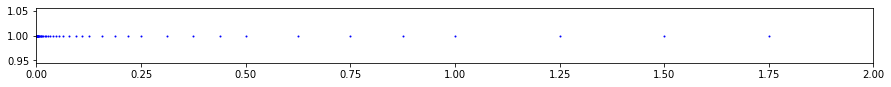

In [99]:
import numpy as np
import matplotlib.pyplot as plt


mantissa_number = 2
exponent_number = 4
width = 15

integer_to_binary_string = lambda integer, number: str(bin(integer))[2:].zfill(number)
mantissa_txt_to_float = lambda txt: 1.0 + (int(txt, 2) / 2**len(txt))
exponent_txt_to_float = lambda txt: -int(txt, 2)
value_from_exponent_and_mantissa = lambda exponent, mantissa: 2**exponent * mantissa

def value_from_integers(integers):
    return value_from_exponent_and_mantissa(
                exponent_txt_to_float(integer_to_binary_string(integers[2], integers[3])), 
                mantissa_txt_to_float(integer_to_binary_string(integers[0], integers[1])))

def plot_scatter(values, x_size = 10):
    plt.figure(figsize=(x_size, 1))
    plt.xlim(0, 2)
    plt.scatter(values, len(values) * [1], c='b', s=1)
    plt.show()

def plot_from_exponent_mantissa_number(exponent_number, mantissa_number, x_size = 10):
    value_list = sorted([value_from_integers([i_m, mantissa_number, i_e, exponent_number]) \
                    for i_m in range( 2**mantissa_number ) \
                    for i_e in range( 2**exponent_number)])
    plot_scatter(np.array(value_list), x_size)

plot_from_exponent_mantissa_number(exponent_number, mantissa_number, width)


In [147]:
import random

def judgement(a, b, f=0.01):
    c = a + b
    x = a * f; y = b * f; z = c * f
    return (x + y == z) == False

# for j in range(10**2):
#     for i in range(j):
#         if judgement(i, j, f=10**-2) == False:
#             print(i, j)
error_list = []
exponent = 3

for j in range(10**exponent):
    for item in [(i,j) for i in range(j) if judgement(i, j, f=10**-exponent)]:
        error_list.append(item)


print(f"Length : {len(error_list)}")
for i, j in random.choices(error_list, k=3):
    print(i, j)



Length : 112521
652 818
797 947
357 924


In [165]:
import random

def judgement(a, e):
    x = a * 10**-e * 10**e
    return (x == a) == False

error_list = []
exp_num = 3

for exponent in range(exp_num):
    e = exponent + 1
    for item in [(i, e) for i in range(10**e) if judgement(i, e)]:
        error_list.append(item)
    
print(f"Length : {len(error_list)}")
for i, j in random.choices(error_list, k=3):
    print(i, j)


Length : 139
475 3
58 2
285 3


In [190]:
def measure(a):
    for e in range(1, 100):
        x = a * 10**-e * 10**e
        if x == a:
            return e
    return e


for i in range(10**6, 10**7):
    if measure(i) > 14:
        print(i, measure(i))



8194871 15


In [194]:
8194871 * 0.0001 * 10000

8194871.000000001

# 在 01 的世界 ， 7 位數以內的數字誰乘法最差
8194871
白衣就是霸氣咦


1123

In [115]:
len(str(round(0.01 + 0.02, 30)))

4

In [7]:
import pdfplumber

pdf_path = '/Users/owenchen/Downloads/The story of O.pdf'
page_number = 0
line_index = 1
line_range = 5 

pdf_obj = pdfplumber.open(pdf_path)
page_now = pdf_obj.pages[page_number]           
texts = page_now.extract_text() 
texts_list = texts.split('\n')

text_begin = line_range * line_index
text_end   = line_range * (line_index + 1)

print(f"All : {len(texts_list)}, begin : {text_begin}, end : {text_end}")

index = text_begin
for text in texts_list[text_begin:text_end]:
    print(index, text)
    index += 1


All : 33, begin : 5, end : 10
5 the edge of a lawn, they notice, at one corner of the park, at an intersection where there are never
6 any taxis, a car which, because of its meter, resembles a taxi.
7 "Get in," he says.
8 She gets in. It is autumn, and coming up to dusk. She is dressed as she always is: high heels, a
9 suit with a pleated skirt, a silk blouse, and no hat. But long gloves which come up over the


In [13]:
from translate import Translator

texts_tran = "/n".join(texts_list[8:10])

translator = Translator(to_lang='zh-tw')
result = translator.translate(texts_tran)
print(result)



她進來了，現在是秋天，快到黃昏了她穿著一如既往：高跟鞋、搭配百褶裙的西裝、真絲上衣和沒有帽子。但是長長的手套


In [4]:
from translate import Translator

translator = Translator(to_lang='zh-tw')
result = translator.translate("Get in,")
print(result)


取得於


In [43]:
sum([0.1]*10)

0.9999999999999999

In [47]:
import math

math.fsum([0.1]*3)


0.30000000000000004

In [19]:
import math

# Return the natural logarithm of different numbers
# print(math.log(2.7183))
print(math.log(2) / math.log(1.1))


7.272540897341713


# Big Mac

* 2023 Big Mac 75
* 2020 Big Mac 72
* 2018 Big Mac 69 (79?)
* 2010 Big Mac 69 
* 1994 Big Mac 68



In [38]:
coin_num = 3

count = 0
count_list = [0]*(coin_num+1)

for i in range(2**coin_num):
    one_num = 0
    for n in str(bin(i))[2:]:
        if n == "1":
            one_num += 1

    count_list[one_num] += 1
    if one_num < 6:
        count += 1

print(f"count : {count}, all : {2**coin_num}, probability : {count / (2**coin_num)}")
count_list



count : 8, all : 8, probability : 1.0


[1, 3, 3, 1]

# 影片處理


In [99]:
from pathlib import Path


path = Path("record/rate_test_new/rate_old/")
# output_stand_1_new.mp4, output_stand_2_new.mp4

# path = Path("record/rate_test_old/stand_rate/")
# output_stand_rate_new.mp4
# output_stand_rate_old.mp4


list(path.glob('*'))





[PosixPath('record/rate_test_new/rate_old/left_oldRate_range1_pre.mp4'),
 PosixPath('record/rate_test_new/rate_old/left_oldRate_range1.mp4'),
 PosixPath('record/rate_test_new/rate_old/.DS_Store'),
 PosixPath('record/rate_test_new/rate_old/left_oldRate.mp4'),
 PosixPath('record/rate_test_new/rate_old/output_stand_1_old.mp4'),
 PosixPath('record/rate_test_new/rate_old/left_oldRate_pre.mp4'),
 PosixPath('record/rate_test_new/rate_old/output_stand_2_old.mp4')]

In [101]:
import cv2
import numpy as np


first_text = "old rate method vs new rate method"
video_name = "old vs new rate.mp4"
all_list = [
    {
        "path": "record/rate_test_old/stand_rate/output_stand_rate_old.mp4",
        "text": "old rate method",
        "start" : 20
    },
    {
        "path": "record/rate_test_old/stand_rate/output_stand_rate_new.mp4",
        "text": "new rate method",
        "start" : 20
    },
    {
        "path": "record/rate_test_new/rate_new/output_stand_1_new.mp4",
        "text": "Bulgarian Split Squat - Left : new rate method",
        "start" : 20
    },
    {
        "path": "record/rate_test_new/rate_old/output_stand_1_old.mp4",
        "text": "Bulgarian Split Squat - Left : old rate method",
        "start" : 20
    },
    {
        "path": "record/rate_test_new/rate_new/output_stand_2_new.mp4",
        "text": "Bulgarian Split Squat - Right : new rate method",
        "start" : 20
    },
    {
        "path": "record/rate_test_new/rate_old/output_stand_2_old.mp4",
        "text": "Bulgarian Split Squat - Right : old rate method",
        "start" : 20
    }
]

cap = cv2.VideoCapture(all_list[0]["path"])

# all_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

cap.release()


# 錄製參數設定
frame_size = (int(width), int(height))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(video_name, fourcc, fps, frame_size)


# 白畫布
white_img = np.ones((int(height), int(width), 3), dtype=np.uint8) * 255
cv2.putText(white_img, first_text, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 1, cv2.LINE_AA)

for i in range(int(fps)):
    out.write(white_img)

for item in all_list:
    path = item["path"]
    text = item["text"]
    start = item["start"]

    # 白畫布
    white_img = np.ones((int(height), int(width), 3), dtype=np.uint8) * 255
    cv2.putText(white_img, text, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 1, cv2.LINE_AA)

    for i in range(int(fps)):
        out.write(white_img)

    cap = cv2.VideoCapture(path)
    count = -1
    while(True):
        count += 1
        # 擷取影像
        ret, frame = cap.read()
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        if count > start:
            out.write(frame)

    cap.release()

out.release()



Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...


In [102]:
import cv2
import numpy as np


first_text = "rate one for diff methods"
video_name = "rate one.mp4"
all_list = [
    {
        "path": "record/rate_test_new/rate_one/left_rate1.mp4",
        "text": "Bulgarian Split Squat - Left : rate one, index range 2",
        "start" : 20
    },
    {
        "path": "record/rate_test_new/rate_one/left_rate1_range1.mp4",
        "text": "Bulgarian Split Squat - Left : rate one, index range 1",
        "start" : 20
    },
    {
        "path": "record/rate_test_new/rate_one/left_rate1_pre.mp4",
        "text": "Bulgarian Split Squat - Left : rate one, index range 2, history",
        "start" : 20
    },
    {
        "path": "record/rate_test_new/rate_one/left_rate1_range1_pre.mp4",
        "text": "Bulgarian Split Squat - Left : rate one, index range 1, history",
        "start" : 20
    }
]

cap = cv2.VideoCapture(all_list[0]["path"])

# all_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

cap.release()


# 錄製參數設定
frame_size = (int(width), int(height))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(video_name, fourcc, fps, frame_size)


# 白畫布
white_img = np.ones((int(height), int(width), 3), dtype=np.uint8) * 255
cv2.putText(white_img, first_text, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 1, cv2.LINE_AA)

for i in range(int(fps)):
    out.write(white_img)

for item in all_list:
    path = item["path"]
    text = item["text"]
    start = item["start"]

    # 白畫布
    white_img = np.ones((int(height), int(width), 3), dtype=np.uint8) * 255
    cv2.putText(white_img, text, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 1, cv2.LINE_AA)

    for i in range(int(fps)):
        out.write(white_img)

    cap = cv2.VideoCapture(path)
    count = -1
    while(True):
        count += 1
        # 擷取影像
        ret, frame = cap.read()
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        if count > start:
            out.write(frame)

    cap.release()

out.release()

Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...


In [103]:
import cv2
import numpy as np


first_text = "rate old for diff methods"
video_name = "rate old.mp4"
all_list = [
    {
        "path": "record/rate_test_new/rate_old/left_oldRate.mp4",
        "text": "Bulgarian Split Squat - Left : rate old, index range 2",
        "start" : 20
    },
    {
        "path": "record/rate_test_new/rate_old/left_oldRate_range1.mp4",
        "text": "Bulgarian Split Squat - Left : rate old, index range 1",
        "start" : 20
    },
    {
        "path": "record/rate_test_new/rate_old/left_oldRate_pre.mp4",
        "text": "Bulgarian Split Squat - Left : rate old, index range 2, history",
        "start" : 20
    },
    {
        "path": "record/rate_test_new/rate_old/left_oldRate_range1_pre.mp4",
        "text": "Bulgarian Split Squat - Left : rate old, index range 1, history",
        "start" : 20
    }
]

cap = cv2.VideoCapture(all_list[0]["path"])

# all_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

cap.release()


# 錄製參數設定
frame_size = (int(width), int(height))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(video_name, fourcc, fps, frame_size)


# 白畫布
white_img = np.ones((int(height), int(width), 3), dtype=np.uint8) * 255
cv2.putText(white_img, first_text, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 1, cv2.LINE_AA)

for i in range(int(fps)):
    out.write(white_img)

for item in all_list:
    path = item["path"]
    text = item["text"]
    start = item["start"]

    # 白畫布
    white_img = np.ones((int(height), int(width), 3), dtype=np.uint8) * 255
    cv2.putText(white_img, text, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 1, cv2.LINE_AA)

    for i in range(int(fps)):
        out.write(white_img)

    cap = cv2.VideoCapture(path)
    count = -1
    while(True):
        count += 1
        # 擷取影像
        ret, frame = cap.read()
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        if count > start:
            out.write(frame)

    cap.release()

out.release()



Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...


In [104]:
import cv2
import numpy as np


first_text = "rate new for diff methods"
video_name = "rate new.mp4"
all_list = [
    {
        "path": "record/rate_test_new/rate_new/left_newRate_fix.mp4",
        "text": "Bulgarian Split Squat - Left : rate old, index range 2",
        "start" : 20
    },
    {
        "path": "record/rate_test_new/rate_new/left_newRate_range1_fix.mp4",
        "text": "Bulgarian Split Squat - Left : rate old, index range 1",
        "start" : 20
    },
    {
        "path": "record/rate_test_new/rate_new/left_newRate_pre_fix.mp4",
        "text": "Bulgarian Split Squat - Left : rate old, index range 2, history",
        "start" : 20
    },
    {
        "path": "record/rate_test_new/rate_new/left_newRate_range1_pre_fix.mp4",
        "text": "Bulgarian Split Squat - Left : rate old, index range 1, history",
        "start" : 20
    }
]

cap = cv2.VideoCapture(all_list[0]["path"])

# all_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

cap.release()


# 錄製參數設定
frame_size = (int(width), int(height))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(video_name, fourcc, fps, frame_size)


# 白畫布
white_img = np.ones((int(height), int(width), 3), dtype=np.uint8) * 255
cv2.putText(white_img, first_text, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 1, cv2.LINE_AA)

for i in range(int(fps)):
    out.write(white_img)

for item in all_list:
    path = item["path"]
    text = item["text"]
    start = item["start"]

    # 白畫布
    white_img = np.ones((int(height), int(width), 3), dtype=np.uint8) * 255
    cv2.putText(white_img, text, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 1, cv2.LINE_AA)

    for i in range(int(fps)):
        out.write(white_img)

    cap = cv2.VideoCapture(path)
    count = -1
    while(True):
        count += 1
        # 擷取影像
        ret, frame = cap.read()
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        if count > start:
            out.write(frame)

    cap.release()

out.release()

Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...


In [52]:
# deal with simple video
# cv2.addWeighted(src1, alpha, src2, beta, gamma)

import cv2
import matplotlib.pyplot as plt

video_name = '002_s'


root_path  = '../../MyPictures/flash_pica_video/1024/'
video_path = root_path + video_name + '.mp4'
image_root = root_path + video_name + 'imple/'

cap = cv2.VideoCapture( video_path )

# fps = cap.get(cv2.CAP_PROP_FPS)
# print('fps : ', fps)

count = 0
while cap.isOpened():
    ret, frame = cap.read()
    
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    image_name = video_name + '_' + str(count).zfill(2) + '.png'
    image_path = image_root + image_name
    
    cv2.imwrite(image_path, frame)
    count += 1
    
cap.release()

# plt.figure(figsize=(10,10))
# plt.imshow(frame[:,:,::-1])
# plt.show()




Can't receive frame (stream end?). Exiting ...


In [ ]:
# write video
import cv2
                        
width = 1024
height = 1024
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter('output.mp4', fourcc, 5.0, (width,  height))  

root_path_1  = '../../MyPictures/flash_pica_video/1024/001_detail/replicate-001_s_'
root_path_2  = '../../MyPictures/flash_pica_video/1024/002_detail/replicate-002_s_'


# out.write(frame)       

for i in range(14):
    

# out.release()      




In [89]:
import cv2
from pathlib import Path

root   = Path('../../MyPictures/flash_pica_video/1024/')
sub_folder_list = ['002_detail', '002_detail', '002_detail']

width = 2048
height = 2048
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('pica_flash_2048_f5_re3.mp4', fourcc, 5.0, (width,  height))  

def root_sort_reverse(root):
    return sorted(root.glob('*.png')) + sorted(root.glob('*.png'), reverse=True)

for folder in sub_folder_list:
    for path in root_sort_reverse(root/folder):
        image_bgr = cv2.imread(str(path))
        # re_image_bgr = cv2.resize(image_bgr, (width, height), interpolation=cv2.INTER_AREA)
        # print(image_bgr.shape)
        out.write(image_bgr)

out.release()



In [81]:
import cv2

video_path_list = [
    '../../MyPictures/flash_pica_video/576/000199_stable_up.mp4',
    '../../MyPictures/flash_pica_video/576/000204_stable_down.mp4',
    '../../MyPictures/flash_pica_video/576/000199_stable_up.mp4',
    '../../MyPictures/flash_pica_video/576/000204_stable_down.mp4',
] 

width = 1024
height = 576
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('pica_flash_576_f10_re2.mp4', fourcc, 10.0, (width,  height))  

def video_list_reverse(video_path):
    first_list = []
    second_list = []
    cap = cv2.VideoCapture( video_path )
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        first_list.append(frame)
        second_list.insert(0, frame)
    return first_list + second_list

for video_path in video_path_list:
    for frame in video_list_reverse(video_path):
        out.write(frame)

out.release()





In [87]:
import cv2

image_path = '../../MyPictures/拿破崙/3229034-PH.jpg'
image_target_path = '../../MyPictures/拿破崙/3229034-PH_cut.jpg'

image_bgr = cv2.imread(image_path)
# image_bgr.shape       # (956, 800) -> (956, 537)

x = 0
y = 100
w = 956
h = 537
crop_image_bgr = image_bgr[y:y+h, x:x+w]

cv2.imwrite(image_target_path, crop_image_bgr) 



True

537.75